# HarvardX_MITx_Person_Course_Dataset_Exploration

In this project, we explore the patterns of retention in MOOC. 

# Research questions
Our research questions in this project are:

- What are the certification rates among different subpopulations
- What factors affect certification rate

# Exploration of Registered



## Loading Data

In [1]:
# import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import scipy.stats as stats
from scipy.stats import chisquare
from scipy.stats import ttest_ind 
from scipy.stats import binom_test
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import ztest

%matplotlib inline

In [2]:
# load dataset of registered
df_registered = pd.read_csv('data/hmx_eda.csv', parse_dates=['time_registered', 'last_event', 'course_launch', 'course_wrap'])
df_registered.head()

,course_id,user_id,viewed,explored,certified,country,education,gender,grade,time_registered,...,course_code,semester,region,age,course_launch,course_wrap,course_duration,registered_launch_delta,course_subject,lifetime_proportion
0,HarvardX/CS50x/2012,MHxPC130422039,0,0,0,Unknown/Other,Secondary,m,0.0,2012-07-24,...,CS50x,2012_Fall,NonUS,25.0,2012-10-15,2013-04-15,182,-83,OTHERS,0.000000
1,HarvardX/CS50x/2012,MHxPC130407931,0,0,0,United States,Secondary,f,0.0,2012-07-24,...,CS50x,2012_Fall,US,44.0,2012-10-15,2013-04-15,182,-83,OTHERS,0.000000
2,HarvardX/PH207x/2012_Fall,MHxPC130313697,0,0,0,India,Bachelor's,m,0.0,2012-07-24,...,PH207x,2012_Fall,NonUS,23.0,2012-10-15,2013-01-30,107,-83,OTHERS,266.355140
3,HarvardX/CS50x/2012,MHxPC130064950,0,0,0,Unknown/Other,Master's,m,0.0,2012-07-24,...,CS50x,2012_Fall,NonUS,34.0,2012-10-15,2013-04-15,182,-83,OTHERS,0.000000
4,HarvardX/PH207x/2012_Fall,MHxPC130237753,1,0,0,United States,Secondary,m,0.0,2012-07-24,...,PH207x,2012_Fall,US,19.0,2012-10-15,2013-01-30,107,-83,OTHERS,65.420561


## Background of registered dataset

### Basic Information

In [3]:
# size of registered
print('The dataset for registered has {} records with {} columns'.format(df_registered.shape[0], df_registered.shape[1]))

The dataset for registered has 402750 records with 27 columns


In [4]:
# basic info 
df_registered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402750 entries, 0 to 402749
Data columns (total 27 columns):
course_id                  402750 non-null object
user_id                    402750 non-null object
viewed                     402750 non-null int64
explored                   402750 non-null int64
certified                  402750 non-null int64
country                    402750 non-null object
education                  402750 non-null object
gender                     402750 non-null object
grade                      402750 non-null float64
time_registered            402750 non-null datetime64[ns]
last_event                 402750 non-null datetime64[ns]
nevents                    402750 non-null float64
ndays_act                  402750 non-null float64
nplay_video                402750 non-null float64
nchapters                  402750 non-null float64
nforum_posts               402750 non-null int64
institution                402750 non-null object
course_code           

In [5]:
# statistical description
df_registered.describe().round(2)

,viewed,explored,certified,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,age,course_duration,registered_launch_delta,lifetime_proportion
count,402750.00,402750.00,402750.00,402750.00,402750.00,402750.00,402750.00,402750.00,402750.00,402750.00,402750.00,402750.00,402750.00
mean,0.59,0.07,0.03,0.04,343.83,4.61,38.21,2.29,0.02,27.28,129.06,9.91,46.02
std,0.49,0.26,0.18,0.16,1302.27,10.55,213.80,4.16,0.17,8.83,33.93,73.51,55.42
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,71.00,-147.00,0.00
25%,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,21.00,107.00,-36.00,0.00
50%,1.00,0.00,0.00,0.00,9.00,1.00,0.00,1.00,0.00,25.00,120.00,-3.00,21.67
75%,1.00,0.00,0.00,0.00,100.00,3.00,5.00,3.00,0.00,30.00,166.00,33.00,80.77
max,1.00,1.00,1.00,1.00,53180.00,205.00,34596.00,47.00,6.00,82.00,182.00,327.00,339.80


In [6]:
# number of unique course_id
df_registered.course_id.nunique()

16

In [7]:
# value counts of course_id
df_registered.course_id.value_counts()

HarvardX/CS50x/2012            84402
MITx/6.00x/2012_Fall           52504
HarvardX/ER22x/2013_Spring     40444
MITx/6.00x/2013_Spring         36595
HarvardX/PH207x/2012_Fall      32337
HarvardX/PH278x/2013_Spring    26277
MITx/6.002x/2012_Fall          23738
MITx/14.73x/2013_Spring        20840
HarvardX/CB22x/2013_Spring     19860
MITx/8.02x/2013_Spring         16198
MITx/7.00x/2013_Spring         14287
MITx/6.002x/2013_Spring        11885
MITx/3.091x/2012_Fall          10112
MITx/8.MReV/2013_Summer         6193
MITx/2.01x/2013_Spring          3762
MITx/3.091x/2013_Spring         3316
Name: course_id, dtype: int64

In [8]:
# min count and  max count
df_registered.course_id.value_counts().describe().round(2)

count       16.00
mean     25171.88
std      21006.65
min       3316.00
25%      11441.75
50%      20350.00
75%      33401.50
max      84402.00
Name: course_id, dtype: float64

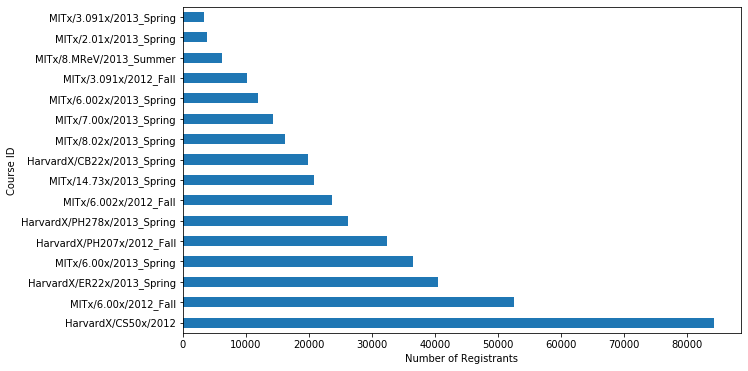

In [9]:
# bar plot of course_id
plt.figure(figsize=(10, 6))
df_registered.course_id.value_counts().sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Number of Registrants')
plt.ylabel('Course ID')
plt.savefig("plots/1.pdf", bbox_inches='tight', edge_color='black');

There are 16 courses in this dataset. This includes 3 courses offered twice. The number of enrolments varies a lot from course to course. The minimum enrolment is 3316, while the maximum is 84402.

In [10]:
# value counts of viewed
df_registered.viewed.value_counts()

1    239491
0    163259
Name: viewed, dtype: int64

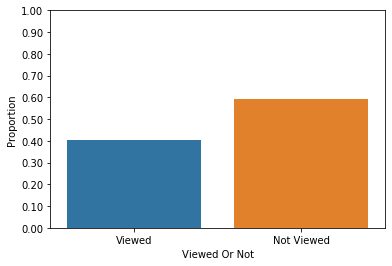

In [11]:
# bar chart of viewed 
sb.countplot(data=df_registered, x='viewed')
n_records = df_registered.shape[0]
tick_props = np.arange(0, 1+0.1, 0.1)
tick_names = ['{:.2f}'.format(x) for x in tick_props]
plt.yticks(tick_props*n_records, tick_names)
plt.xlabel('Viewed Or Not')
plt.xticks([0, 1], ['Viewed', 'Not Viewed'])
plt.ylabel('Proportion');

Around 60% of the registered viewed the courses

In [12]:
# value counts of explored
df_registered.explored.value_counts()

0    374164
1     28586
Name: explored, dtype: int64

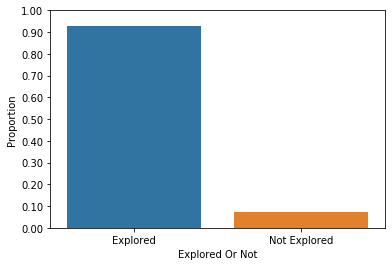

In [13]:
# bar chart of explored
sb.countplot(data=df_registered, x='explored')
n_records = df_registered.shape[0]
tick_props = np.arange(0, 1+0.1, 0.1)
tick_names = ['{:.2f}'.format(x) for x in tick_props]
plt.yticks(tick_props*n_records, tick_names)
plt.xlabel('Explored Or Not')
plt.xticks([0, 1], ['Explored', 'Not Explored'])
plt.ylabel('Proportion');

Only less than 10% registered explored the course. 

### Demographics

***Country***

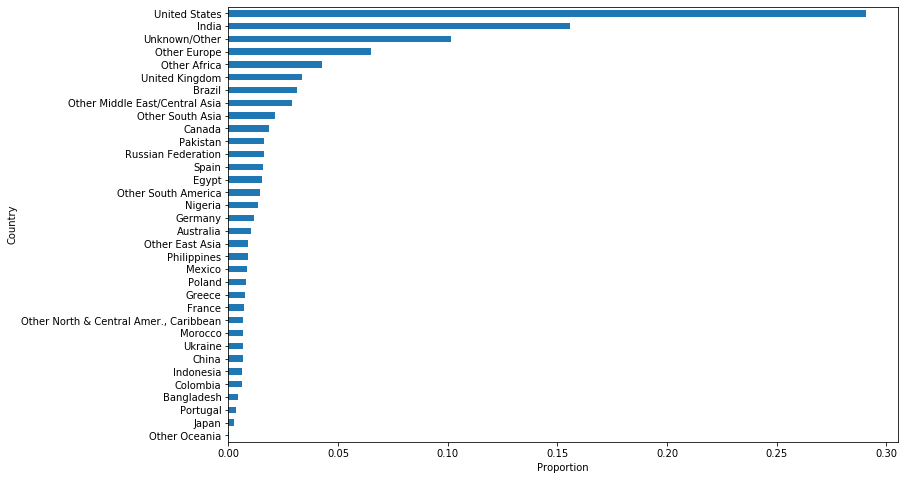

In [14]:
# country of registered
(df_registered.groupby('country').user_id.count() / df_registered.shape[0]).sort_values().plot(figsize=(12, 8), kind='barh');
plt.xlabel('Proportion')
plt.ylabel('Country')
plt.savefig("plots/2.pdf", bbox_inches='tight');

US has the largest number of registrants, around 30% registrants are from US. India has second largest number of registrants, the percentage is about 15%.

***Level of Education***

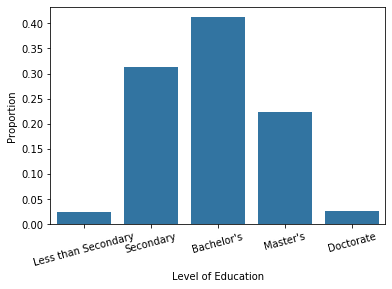

In [15]:
# Level of educatoin
n_records = df_registered.shape[0]
max_value = df_registered.education.value_counts().max()
max_prop = max_value / n_records
tick_props = np.arange(0, max_prop+0.01, 0.05)
tick_names = ['{:.2f}'.format(x) for x in tick_props]

base_color = sb.color_palette()[0]
order = ['Less than Secondary','Secondary', "Bachelor's", "Master's", 'Doctorate']
sb.countplot(data=df_registered, x='education', color=base_color, order=order)
plt.xticks(rotation=15)
plt.yticks(tick_props*n_records, tick_names)
plt.xlabel('Level of Education')
plt.ylabel('Proportion')
plt.savefig("plots/3.pdf", bbox_inches='tight');

As much as 40% students hold a Bachelor's Degree, while around 20% hold a Master's, 3% hold a Doctorate Degree. That is to say, the majority of the students have an education level of Bachelor's or higher. We are educating the well educated in MOOC.

***Age***

In [16]:
# statistical description of age
df_registered['age'].describe().round(2)

count    402750.00
mean         27.28
std           8.83
min          10.00
25%          21.00
50%          25.00
75%          30.00
max          82.00
Name: age, dtype: float64

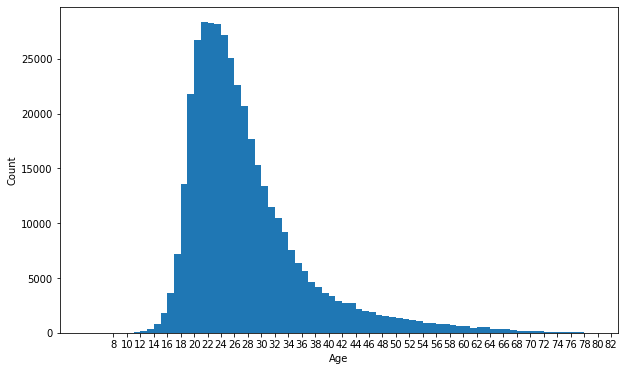

In [17]:
# distribution of age
plt.figure(figsize=(10,6))
max_age = df_registered.age.max()
min_age = df_registered.age.min()

bins = np.arange(0, max_age+1, 1)
ticks = np.arange(8, max_age+1, 2)
plt.hist(data=df_registered, x='age', bins=bins)
plt.xticks(ticks)
plt.xlim(0, 83)
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig("plots/4.pdf", bbox_inches='tight');

The age of the learners varies from 10 years old to 82 years old. Most learners are in their 20s and 30s. The peak of the distribution appears at around 20 years old, and there is a long tail for more than 50 years old.

***Gender***

In [18]:
# value counts of gender
df_registered.gender.value_counts()

m    298463
f    104287
Name: gender, dtype: int64

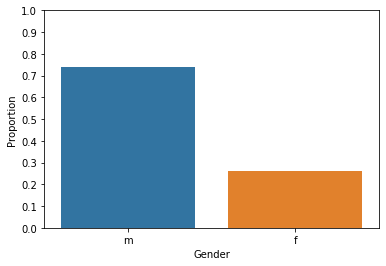

In [19]:
# bar chart of gender
sb.countplot(data=df_registered, x='gender')
n_records = df_registered.shape[0]
tick_props = np.arange(0, 1+0.1, 0.1)
tick_names = ['{:.1f}'.format(x) for x in tick_props]
plt.yticks(tick_props*n_records, tick_names)
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.savefig("plots/5.pdf", bbox_inches='tight');

About 75% of the students are male and only about 25% are female.

## Overall certification rate

### Overall certification rate of registered

In [20]:
# count of certified
certified_count = df_registered[df_registered.certified == 1].shape[0]

In [21]:
print('Among {} registered, only {} finally got certified, the overall certification rate is about {:.0%}'.format(df_registered.shape[0], certified_count, (certified_count/ df_registered.shape[0])))


Among 402750 registered, only 13673 finally got certified, the overall certification rate is about 3%


### Overall certification rate of viewed

In [22]:
# value counts of certified among viewed
df_registered[df_registered.viewed == 1].certified.value_counts()

0    225818
1     13673
Name: certified, dtype: int64

In [23]:
# certification rate of viewed
100*df_registered[df_registered.viewed == 1].certified.value_counts()[1] / df_registered[df_registered.viewed == 1].shape[0]


5.709191577136511

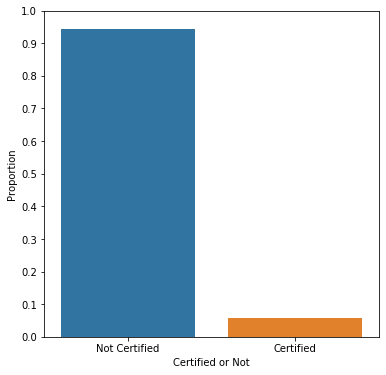

In [24]:
# overall certification rate of viewed
plt.figure(figsize=(6, 6))
sb.countplot(data=df_registered[df_registered.viewed == 1], x='certified')
n_records = df_registered[df_registered.viewed == 1].shape[0]
tick_props = np.arange(0, 1+0.1, 0.1)
tick_names = ['{:.1f}'.format(x) for x in tick_props]
plt.yticks(tick_props*n_records, tick_names)
plt.xlabel('Certified or Not')
plt.xticks([0, 1], ['Not Certified', 'Certified'])
plt.ylabel('Proportion')
plt.savefig("plots/6.pdf", bbox_inches='tight');

The certification rate of viewed is about 6%. This is higher than the overall certification rate, but this is still very low.

### Overall certification rate of explored

In [25]:
# value counts of certified among viewed
df_registered[df_registered.explored == 1].certified.value_counts()

0    15513
1    13073
Name: certified, dtype: int64

In [26]:
# certification rate of viewed
100*df_registered[df_registered.explored == 1].certified.value_counts()[1] / df_registered[df_registered.explored == 1].shape[0]

45.73217658993913

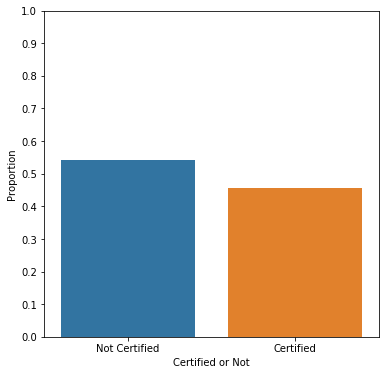

In [27]:
# overall certification rate of viewed
plt.figure(figsize=(6, 6))
sb.countplot(data=df_registered[df_registered.explored == 1], x='certified')
n_records = df_registered[df_registered.explored == 1].shape[0]
tick_props = np.arange(0, 1+0.1, 0.1)
tick_names = ['{:.1f}'.format(x) for x in tick_props]
plt.yticks(tick_props*n_records, tick_names)
plt.xlabel('Certified or Not')
plt.xticks([0, 1], ['Not Certified', 'Certified'])
plt.ylabel('Proportion')
plt.savefig("plots/7.pdf", bbox_inches='tight');

The certification rate of explored is about 46%. 

Based on above, numbers of learners from each subpopulation  as well we overall certification rate are shown in table below:

|  Subpopulation | Count  |  Percentage of Registered (%) | Overall Certification Rate (%)| 
|---|---|---|---|
| Registered  | 402750  | 100 | 3 |  
| Viewed  | 239491  |  59 | 6 | 
| Explored  | 28586  | 7 | 46  | 

## Certification rate by course

### Certification rate of registered by course

In [28]:
# certification rate of registered 
certification_rate_registered = 100*(df_registered[df_registered.certified==1].groupby('course_id').certified.count()) / df_registered.groupby('course_id').certified.count()
print('Certification rate of registered:')
certification_rate_registered.sort_values(ascending=True).round(2)


Certification rate of registered:


course_id
HarvardX/CS50x/2012            1.26
HarvardX/CB22x/2013_Spring     1.62
HarvardX/PH278x/2013_Spring    2.41
MITx/8.02x/2013_Spring         2.56
MITx/6.00x/2013_Spring         2.61
MITx/6.00x/2012_Fall           3.06
MITx/3.091x/2013_Spring        3.20
MITx/8.MReV/2013_Summer        3.33
MITx/7.00x/2013_Spring         3.77
MITx/6.002x/2013_Spring        3.95
MITx/2.01x/2013_Spring         4.33
MITx/3.091x/2012_Fall          4.48
HarvardX/ER22x/2013_Spring     4.87
MITx/6.002x/2012_Fall          4.89
HarvardX/PH207x/2012_Fall      5.36
MITx/14.73x/2013_Spring        9.04
Name: certified, dtype: float64

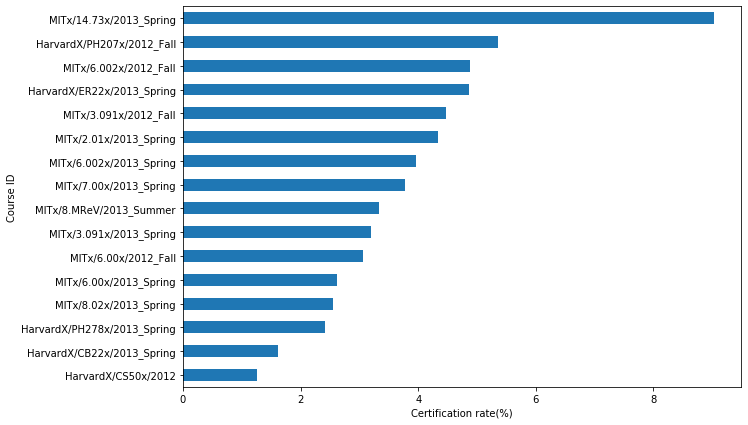

In [29]:
# bar chart of certification rate of registered
certification_rate_registered.sort_values(ascending=True).plot(figsize=(10, 7), kind='barh')
plt.xlabel('Certification rate(%)')
plt.ylabel('Course ID')
plt.savefig("plots/8.pdf", bbox_inches='tight');

In [30]:
# statistical description
certification_rate_registered.describe().round(2)

count    16.00
mean      3.80
std       1.83
min       1.26
25%       2.60
50%       3.55
75%       4.58
max       9.04
Name: certified, dtype: float64

For the 16 courses, the certification rates of registered range from 1.26% to 9.04%, with a mean of 3.80% and a standard deviation of 1.83%. The certification rates are very low.

### Certification rate of viewed by course

In [31]:
# subset of viewed
df_viewed = df_registered[df_registered.viewed == 1]

# certification rate by course
certification_rate_viewed = 100*(df_viewed[df_viewed.certified==1].groupby('course_id').certified.count()) / df_viewed.groupby('course_id').certified.count()
print('Certification rate of viewed:')
certification_rate_viewed.sort_values(ascending=True).round(2)


Certification rate of viewed:


course_id
MITx/6.00x/2013_Spring          2.61
HarvardX/CB22x/2013_Spring      2.92
HarvardX/CS50x/2012             3.08
MITx/3.091x/2013_Spring         3.20
MITx/8.02x/2013_Spring          3.36
MITx/8.MReV/2013_Summer         4.37
MITx/6.00x/2012_Fall            4.97
MITx/7.00x/2013_Spring          5.62
HarvardX/PH278x/2013_Spring     6.09
MITx/2.01x/2013_Spring          6.25
MITx/6.002x/2013_Spring         7.55
MITx/6.002x/2012_Fall           7.79
HarvardX/ER22x/2013_Spring      8.37
MITx/3.091x/2012_Fall           8.94
HarvardX/PH207x/2012_Fall       9.00
MITx/14.73x/2013_Spring        14.28
Name: certified, dtype: float64

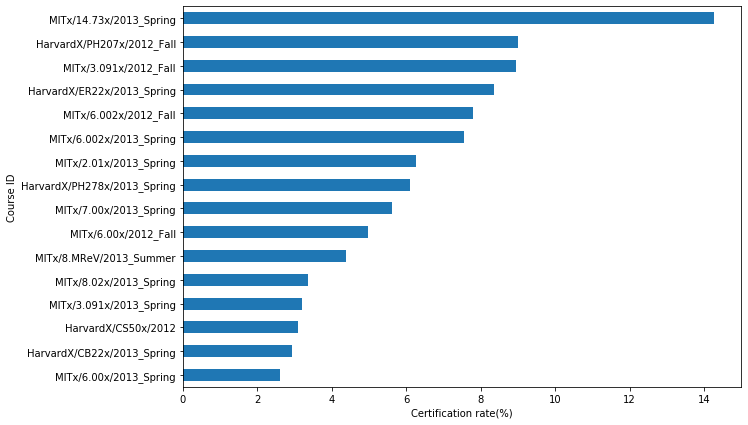

In [32]:
# bar chart of certification rate of viewed
certification_rate_viewed.sort_values(ascending=True).plot(figsize=(10, 7), kind='barh')
plt.xlabel('Certification rate(%)')
plt.ylabel('Course ID')
plt.savefig("plots/9.pdf", bbox_inches='tight');

In [33]:
# statistical description
certification_rate_viewed.describe().round(2)

count    16.00
mean      6.15
std       3.11
min       2.61
25%       3.32
50%       5.86
75%       7.94
max      14.28
Name: certified, dtype: float64

The certification rates of viewed vary from 2.61% to 14.28%, with a mean of 6.15% and standard deviation of 3.11%.

### Certification rate of explored by course

In [34]:
# subset of explored
df_explored = df_registered[df_registered.explored == 1]


# certification rate by course
certification_rate_explored = (100*(df_explored[df_explored.certified==1].groupby('course_id').certified.count()) / df_explored.groupby('course_id').certified.count()).round(2)
print('Certification rate of explored:')
certification_rate_explored.sort_values(ascending=True).round(2)

Certification rate of explored:


course_id
HarvardX/CS50x/2012            14.59
MITx/8.02x/2013_Spring         42.12
MITx/2.01x/2013_Spring         42.52
HarvardX/PH207x/2012_Fall      45.24
MITx/6.00x/2013_Spring         47.23
MITx/7.00x/2013_Spring         50.10
MITx/6.00x/2012_Fall           55.91
HarvardX/ER22x/2013_Spring     56.18
HarvardX/PH278x/2013_Spring    58.72
MITx/6.002x/2012_Fall          61.97
MITx/8.MReV/2013_Summer        70.80
MITx/6.002x/2013_Spring        71.32
MITx/3.091x/2012_Fall          72.02
MITx/14.73x/2013_Spring        72.49
HarvardX/CB22x/2013_Spring     74.19
MITx/3.091x/2013_Spring        80.00
Name: certified, dtype: float64

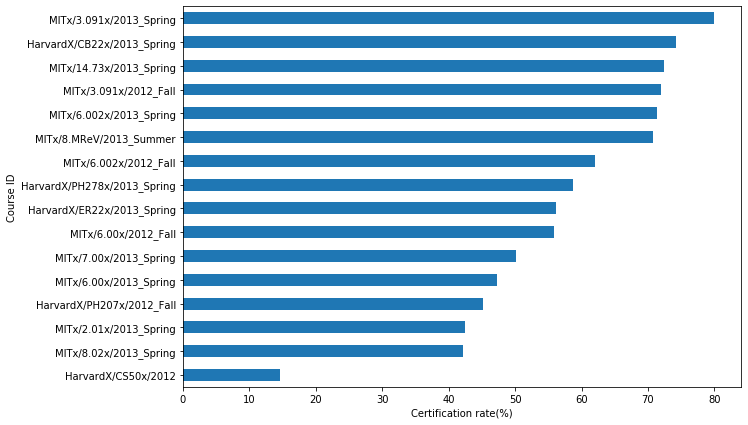

In [35]:
# bar chart of certification rate of explored
certification_rate_explored.sort_values(ascending=True).plot(figsize=(10, 7), kind='barh')
plt.xlabel('Certification rate(%)')
plt.ylabel('Course ID')
plt.savefig("plots/10.pdf", bbox_inches='tight');

In [36]:
# statistical description
certification_rate_explored.describe().round()

count    16.0
mean     57.0
std      17.0
min      15.0
25%      47.0
50%      57.0
75%      71.0
max      80.0
Name: certified, dtype: float64

The certification rate of explored varies from 14.59% to 80.00%, with a mean of 57.21% and standard deviation of 17.0%

Based on above, we will make a table to show the certification rate by course among different subpopulations.

In [37]:
certification_rate_course = pd.merge(pd.merge(certification_rate_registered.round(2), certification_rate_viewed.round(2), left_index=True, right_index=True), \
         certification_rate_explored.round(2), left_index=True, right_index=True).reset_index()
certification_rate_course.columns = ['course_id', 'certification_rate_registered', 'certification_rate_viewed', 'certification_rate_explored']
certification_rate_course

,course_id,certification_rate_registered,certification_rate_viewed,certification_rate_explored
0,HarvardX/CB22x/2013_Spring,1.62,2.92,74.19
1,HarvardX/CS50x/2012,1.26,3.08,14.59
2,HarvardX/ER22x/2013_Spring,4.87,8.37,56.18
3,HarvardX/PH207x/2012_Fall,5.36,9.00,45.24
4,HarvardX/PH278x/2013_Spring,2.41,6.09,58.72
5,MITx/14.73x/2013_Spring,9.04,14.28,72.49
6,MITx/2.01x/2013_Spring,4.33,6.25,42.52
7,MITx/3.091x/2012_Fall,4.48,8.94,72.02
8,MITx/3.091x/2013_Spring,3.20,3.20,80.00
9,MITx/6.002x/2012_Fall,4.89,7.79,61.97


In [38]:
certification_rate_course_des = pd.merge(pd.merge(certification_rate_registered.describe().round(2), certification_rate_viewed.describe().round(2), left_index=True, right_index=True), \
         certification_rate_explored.describe().round(2), left_index=True, right_index=True).reset_index()
certification_rate_course_des.columns = ['course_id', 'certification_rate_registered', 'certification_rate_viewed', 'certification_rate_explored']
certification_rate_course_des.iloc[0] = ''
certification_rate_course_des

,course_id,certification_rate_registered,certification_rate_viewed,certification_rate_explored
0,,,,
1,mean,3.8,6.15,57.21
2,std,1.83,3.11,16.78
3,min,1.26,2.61,14.59
4,25%,2.6,3.32,46.73
5,50%,3.55,5.86,57.45
6,75%,4.58,7.94,71.49
7,max,9.04,14.28,80


In [39]:
pd.concat([certification_rate_course, certification_rate_course_des])

,course_id,certification_rate_registered,certification_rate_viewed,certification_rate_explored
0,HarvardX/CB22x/2013_Spring,1.62,2.92,74.19
1,HarvardX/CS50x/2012,1.26,3.08,14.59
2,HarvardX/ER22x/2013_Spring,4.87,8.37,56.18
3,HarvardX/PH207x/2012_Fall,5.36,9,45.24
4,HarvardX/PH278x/2013_Spring,2.41,6.09,58.72
5,MITx/14.73x/2013_Spring,9.04,14.28,72.49
6,MITx/2.01x/2013_Spring,4.33,6.25,42.52
7,MITx/3.091x/2012_Fall,4.48,8.94,72.02
8,MITx/3.091x/2013_Spring,3.2,3.2,80
9,MITx/6.002x/2012_Fall,4.89,7.79,61.97


## Certification rate of registered is meaningless

### Never Returned

In [40]:
never_returned = df_registered[df_registered.viewed==0].shape[0]/df_registered.shape[0]
print('{:.0%} of the registrants never returned to the course after registration'.format(never_returned))

41% of the registrants never returned to the course after registration


### Grade

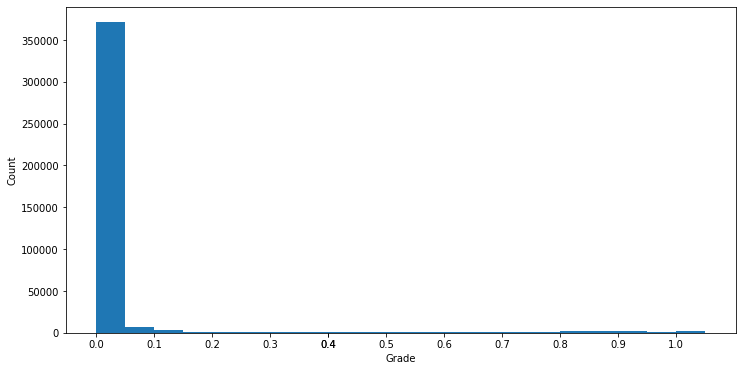

In [41]:
# distribution of grade in bin size 0.05
plt.figure(figsize=(12, 6))
ticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
bins = np.arange(0, 1+0.1, 0.05)
plt.hist(data=df_registered, x='grade', bins=bins)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(ticks)
plt.savefig("plots/11.pdf", bbox_inches='tight');

The distribution of grade is seriously right skewed. Most learners have a grade of close to 0.

In [42]:
# proportion of learners with a grade of 0
grade0_prop = df_registered[df_registered.grade==0].shape[0] / df_registered.shape[0]

print('{:.0%} learners got a grade of 0'.format(grade0_prop))

86% learners got a grade of 0


### nevents, ndays_act, nplay_video, nchapters, nforum_posts: activities

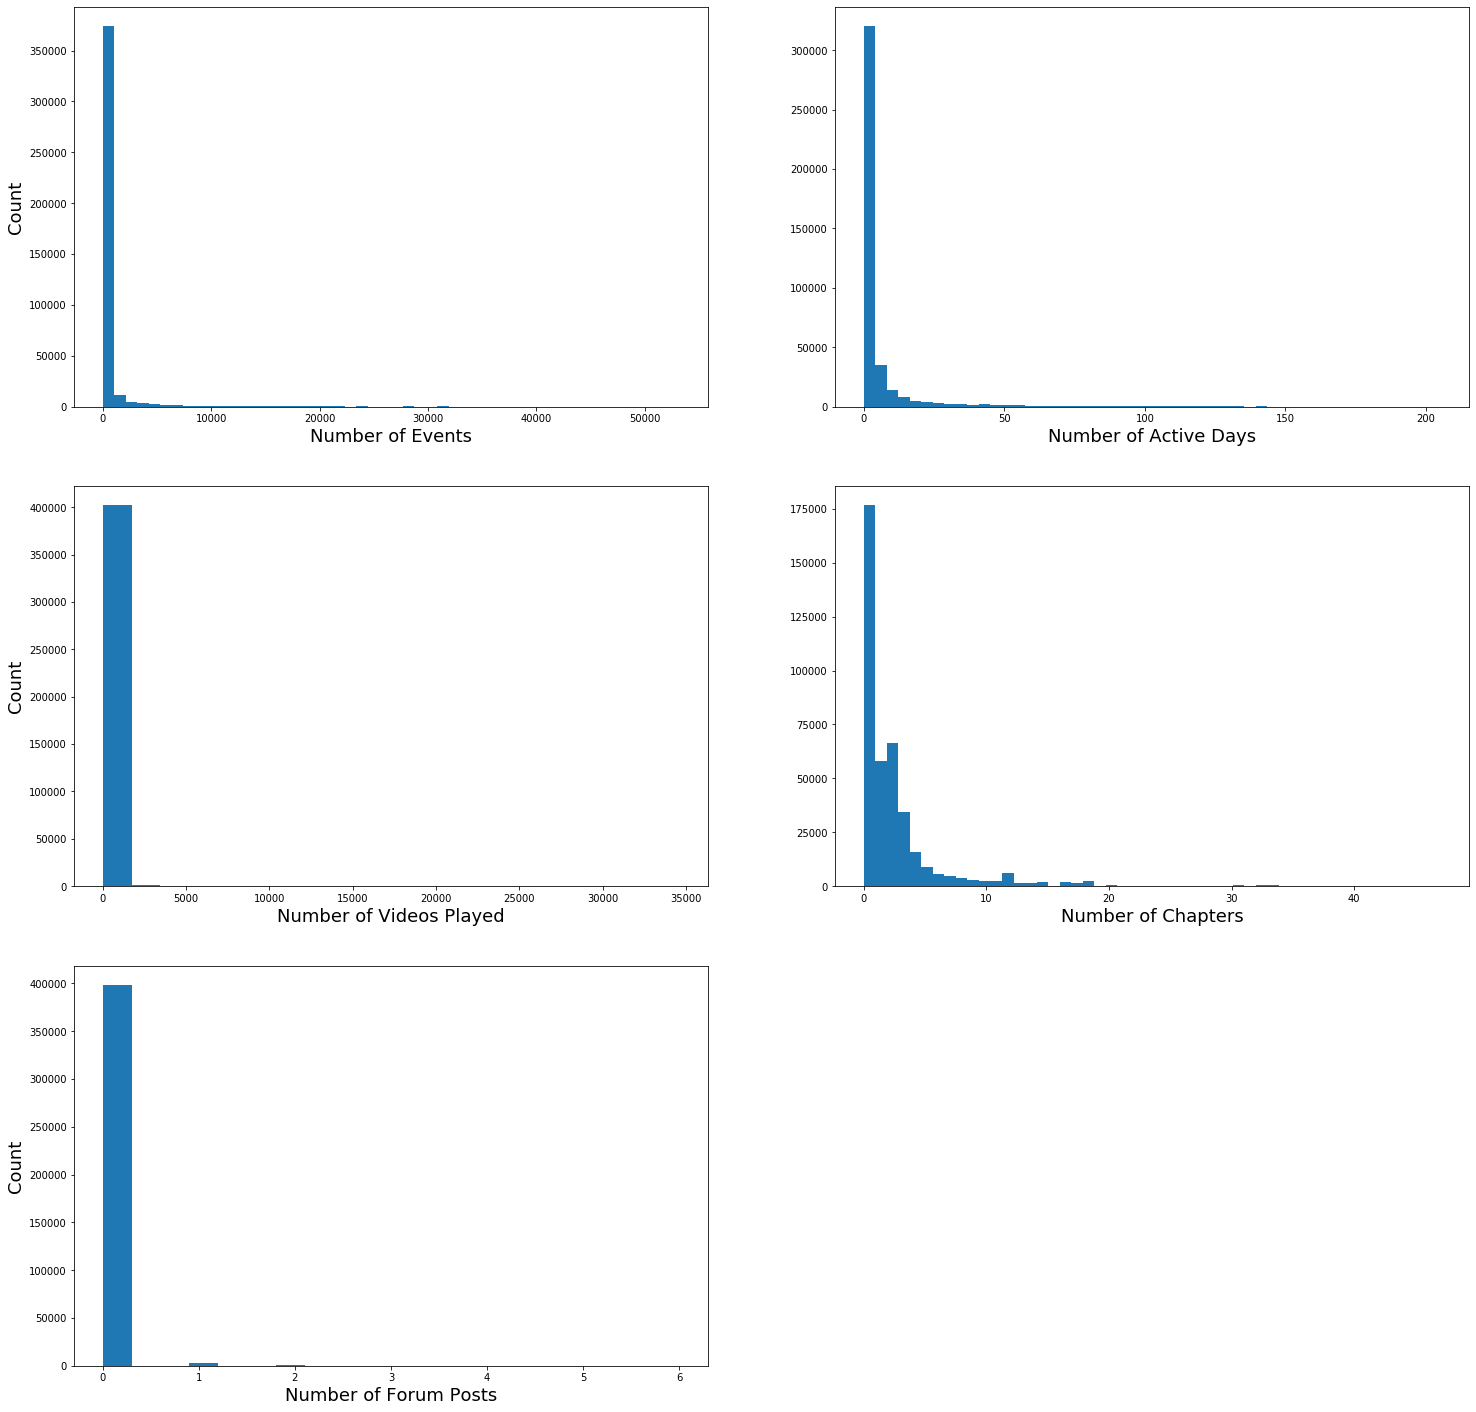

In [43]:
# distribution of nevents, ndays_act, nplay_video, nchapters, nforum_posts
plt.figure(figsize=(25, 25))

plt.subplot(3, 2, 1)
plt.hist(data=df_registered, x='nevents', bins=50)
plt.xlabel('Number of Events', fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.subplot(3, 2, 2)
plt.hist(data=df_registered, x='ndays_act', bins=50)
plt.xlabel('Number of Active Days', fontsize=18)


plt.subplot(3, 2, 3)
plt.hist(data=df_registered, x='nplay_video', bins=20)
plt.xlabel('Number of Videos Played', fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.subplot(3, 2, 4)
plt.hist(data=df_registered, x='nchapters', bins=50)
plt.xlabel('Number of Chapters', fontsize=18)


plt.subplot(3, 2, 5)
plt.hist(data=df_registered, x='nforum_posts', bins=20)
plt.xlabel('Number of Forum Posts', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.savefig("plots/12.pdf", bbox_inches='tight');

The nevents, ndays_act, nplay_video, nchapters, nforum_posts are close to 0 for most of the learners.

Based on the exploration above, 41% of the registrants never returned to the course after registration, 86% learners got a grade of 0, the nevents, ndays_act, nplay_video, nchapters, nforum_posts are close to 0 from most of the learners. All these indicate that many learners did not intend to complete the course. The completion rate of all the registrants is meaningless and misleading, we need to explore completion rate in the context of learners' intention.

# Exploration of Intended

## Define Intended

We totally agree that the learners in MOOC are behaving differently from the traditional education learners. Some registered just to bookmark a course and most of them never came back; Some prospective college students registered to decide which major to take; Some registered to audit the course, did not mean to complete the course. However, we argue that there are still some students who intended to complete the course. Their behavior is similar to that of the traditional education. This subpopulation is our target of research. We will define the intended below to explore their retention pattern. The intended is defined as those who intended to complete a course.

As we know, in traditional on-campus courses, there are 2 weeks that the students can audit the course to decide whether to take the course or not. 2 weeks is roughly 13% of a semester long course. Similarly we will use 13% proportion to filter the intended.

However, this 13% proportion alone may not be enough. To define intended, we will also make sure a learner interacted with the course during his lifetime. We will also use 13% of chapters viewed to filter the intended.

There are some learners who interacted a lot with the course but did not meant to complete the course. We assume that these learners are less likely to do the quizzes and assignments thus their grade may be pretty low. To exclude them from our subset, we will make sure all the intended have a grade greater than 0.

Based on the above, we will use these 3 conditions to filter the intended:

- The learner's lifetime is more than 13% of the course duration
- The learner interacted with at least 13% of the chapters
- The learner's grade is greater than 0

In order to get our subset, first we need to do some feature engineering.

We have the number of chapters the learner viewed, but we do not have the number of chapters in the course. We assume that for each course at least one learner who certified view all the chapters. We will regard the max of nchapters as the number of chapters of the course. Then we will calculate the proportion of chapters viewed in chapters of the course.


In [44]:
# create a dictionary with the course_id as the key, the max of nchapters as the value
nchapters_dic_key = df_registered.groupby('course_id').nchapters.max().index
nchapters_dic_value = df_registered.groupby('course_id').nchapters.max().values
nchapters_dic = dict(zip(nchapters_dic_key, nchapters_dic_value))


In [45]:
# map the dictionary to create a new column course_chapters, then create chapters_proportion variable.
df_registered['course_chapters'] = df_registered['course_id'].map(nchapters_dic)
df_registered['chapters_proportion'] = 100*df_registered['nchapters'] / df_registered['course_chapters']


In [46]:
# create intended variable based on the 2 conditions: lifetime_proportion > 13% and chapters_proportion > 13%
intended_condition =  (df_registered['lifetime_proportion'] > 13) & (df_registered['chapters_proportion'] > 13) & (df_registered['grade'] > 0) 
df_intended= df_registered[intended_condition] 
df_intended.head()

,course_id,user_id,viewed,explored,certified,country,education,gender,grade,time_registered,...,region,age,course_launch,course_wrap,course_duration,registered_launch_delta,course_subject,lifetime_proportion,course_chapters,chapters_proportion
30,HarvardX/CS50x/2012,MHxPC130320562,1,1,1,Other Europe,Master's,m,1.00,2012-07-24,...,NonUS,29.0,2012-10-15,2013-04-15,182,-83,OTHERS,111.538462,12.0,100.00
61,HarvardX/PH207x/2012_Fall,MHxPC130123976,1,1,0,Other Europe,Master's,f,0.29,2012-07-24,...,NonUS,29.0,2012-10-15,2013-01-30,107,-83,OTHERS,267.289720,16.0,56.25
116,HarvardX/ER22x/2013_Spring,MHxPC130076788,1,1,0,Other South Asia,Secondary,m,0.30,2012-12-20,...,NonUS,18.0,2013-03-02,2013-07-26,146,-72,OTHERS,102.054795,34.0,50.00
158,HarvardX/CS50x/2012,MHxPC130574671,1,1,1,Egypt,Secondary,m,1.00,2012-10-16,...,NonUS,17.0,2012-10-15,2013-04-15,182,1,OTHERS,136.263736,12.0,100.00
190,HarvardX/PH207x/2012_Fall,MHxPC130118631,1,0,0,Other Europe,Master's,m,0.18,2012-07-24,...,NonUS,29.0,2012-10-15,2013-01-30,107,-83,OTHERS,35.514019,16.0,43.75


Since our main focus is on intended, we will drop viewed and explored

In [47]:
# drop viewed and explored
df_intended = df_intended.drop(['viewed', 'explored'], axis=1)

In [48]:
# size of the dataset
print('The intended dataset has {} records with {} columns'.format(df_intended.shape[0], df_intended.shape[1]))

The intended dataset has 48278 records with 27 columns


In [49]:
# proportion of subset

print('{:.0%} of the registered in our dataset intended to complete a course'.format(df_intended.shape[0]/df_registered.shape[0]))


12% of the registered in our dataset intended to complete a course


In [50]:
# basic info 
df_intended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48278 entries, 30 to 402436
Data columns (total 27 columns):
course_id                  48278 non-null object
user_id                    48278 non-null object
certified                  48278 non-null int64
country                    48278 non-null object
education                  48278 non-null object
gender                     48278 non-null object
grade                      48278 non-null float64
time_registered            48278 non-null datetime64[ns]
last_event                 48278 non-null datetime64[ns]
nevents                    48278 non-null float64
ndays_act                  48278 non-null float64
nplay_video                48278 non-null float64
nchapters                  48278 non-null float64
nforum_posts               48278 non-null int64
institution                48278 non-null object
course_code                48278 non-null object
semester                   48278 non-null object
region                     48278 non-

In [51]:
# statistical description
df_intended.describe().round(2)

,certified,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,age,course_duration,registered_launch_delta,lifetime_proportion,course_chapters,chapters_proportion
count,48278.00,48278.00,48278.00,48278.00,48278.00,48278.00,48278.00,48278.00,48278.00,48278.00,48278.00,48278.00,48278.00
mean,0.28,0.31,2428.19,22.97,256.98,9.51,0.08,26.96,114.53,-2.26,89.31,19.33,49.72
std,0.45,0.36,2973.88,21.46,529.60,7.00,0.39,8.56,20.81,42.52,59.20,6.75,30.53
min,0.00,0.01,1.00,1.00,0.00,2.00,0.00,11.00,71.00,-147.00,13.01,11.00,13.64
25%,0.00,0.02,561.00,8.00,8.00,4.00,0.00,21.00,107.00,-26.00,38.78,16.00,21.05
50%,0.00,0.11,1264.50,15.00,86.00,7.00,0.00,25.00,111.00,-2.00,88.79,19.00,38.24
75%,1.00,0.66,3173.00,32.00,278.00,13.00,0.00,30.00,120.00,12.00,115.75,19.00,81.73
max,1.00,1.00,53180.00,162.00,24564.00,47.00,6.00,78.00,182.00,325.00,339.80,47.00,100.00


## Certification rate of intended

### Overall certification rate of intended

In [52]:
# value counts of certified among intended
df_intended.certified.value_counts()

0    34615
1    13663
Name: certified, dtype: int64

In [53]:
# certification rate of intended
100*df_intended.certified.value_counts()[1] / df_intended.shape[0]

28.3006752558101

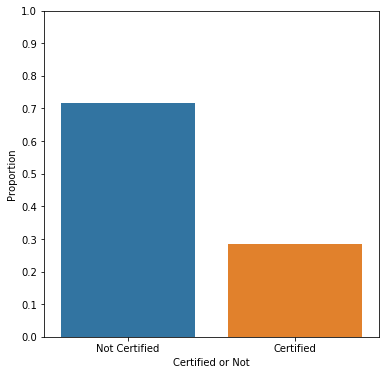

In [54]:
# overall certification rate of intended
plt.figure(figsize=(6, 6))
sb.countplot(data=df_intended, x='certified')
n_records = df_intended.shape[0]
tick_props = np.arange(0, 1+0.1, 0.1)
tick_names = ['{:.1f}'.format(x) for x in tick_props]
plt.yticks(tick_props*n_records, tick_names)
plt.xlabel('Certified or Not')
plt.xticks([0, 1], ['Not Certified', 'Certified'])
plt.ylabel('Proportion')
plt.savefig("plots/13.pdf", bbox_inches='tight');

### Certification rate of intended by course

In [55]:
# certification rate by course
certification_rate_intended = 100*(df_intended[df_intended.certified==1].groupby('course_id').certified.count()) / df_intended.groupby('course_id').certified.count()
print('Certification rate of intended:')
certification_rate_intended.round(2)


Certification rate of intended:


course_id
HarvardX/CB22x/2013_Spring      25.42
HarvardX/CS50x/2012            100.00
HarvardX/ER22x/2013_Spring      43.57
HarvardX/PH207x/2012_Fall       28.73
HarvardX/PH278x/2013_Spring     25.86
MITx/14.73x/2013_Spring         41.66
MITx/2.01x/2013_Spring          22.30
MITx/3.091x/2012_Fall           36.27
MITx/3.091x/2013_Spring         27.89
MITx/6.002x/2012_Fall           31.88
MITx/6.002x/2013_Spring         27.57
MITx/6.00x/2012_Fall            18.70
MITx/6.00x/2013_Spring          12.94
MITx/7.00x/2013_Spring          26.20
MITx/8.02x/2013_Spring          20.70
MITx/8.MReV/2013_Summer         28.65
Name: certified, dtype: float64

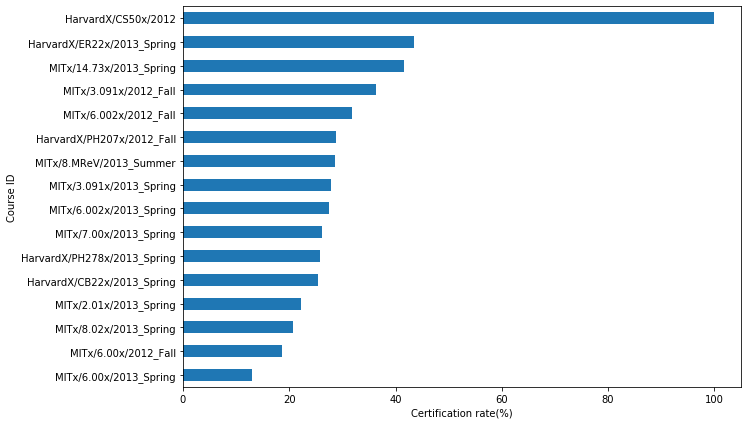

In [56]:
# bar chart of certification rate of intended
certification_rate_intended.sort_values(ascending=True).plot(figsize=(10, 7), kind='barh')
plt.xlabel('Certification rate(%)')
plt.ylabel('Course ID')
plt.savefig("plots/14.pdf", bbox_inches='tight');

In [57]:
# statistical description
certification_rate_intended.describe().round(2)

count     16.00
mean      32.40
std       19.67
min       12.94
25%       24.64
50%       27.73
75%       32.97
max      100.00
Name: certified, dtype: float64

The certification rate of intended ranges from 13% to 100%, with a mean of 32% and standard deviation of 19.67%. This is a little higher than the certification rate of the viewed. But it is still very low.

### Certification rate of intended vs. explored by course

How significant is the difference between Certification rate of intended and Certification rate of explored? We will conduct an t test below to check it out.

In [58]:
# independent t test
t, p = stats.ttest_ind(certification_rate_intended, certification_rate_explored)
print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no significant difference between the two means')

The p value is 0.0005925877994708971

p is very small, there is a significant difference between the two means


In [59]:
certification_rate_audited = [54.98, 64.05, 72.85, 47.12, 51.17, 65.16, 70.6, 48.49, 61.16, 52.92, 77.09, 47.86, 70.83,
                              71.9, 43.96, 57.14, 44.98, 50.78, 35.67, 61.15, 34.08, 25.64, 47.79, 29.47, 60.23, 19.1, 
                              44.26, 58.81, 5.24, 56.74, 31.59, 21.11, 7.58, 64.16, 20.23, 63.18, 26.68, 48.4, 55.21, 
                              37.43, 14.6, 59.63, 45.56, 20.34, 62.19, 23.02, 47.9, 17.98, 49.23, 45.69, 16.37, 62.21, 
                              36.14, 50.19, 63.73, 66.58, 42.75, 31.29, 51.7, 38.17, 39.71, 50.85, 36.38, 51.34, 42.25, 
                              55.36, 32.77, 44.69, 61.45, 40.35, 11.72, 60.79, 38.88, 68.98, 4.21, 49.68, 34.14, 42.82, 
                              12.36, 36.26, 8.51, 59.54, 35.97, 62.85, 56.34, 60.78, 22.54, 29.88, 58.72, 61.71, 52.74,
                              35.48, 65.12, 5.45, 64.17, 62.25, 21.05, 53.07, 46.73, 59.03, 35.2, 32.13, 15.16, 31.5,
                              27.23, 19.39, 22.35, 6.17, 65.42, 17.92, 27.07,64.71, 29.59, 7.67, 32.94, 16.44, 39.76,
                              14.86, 34.21, 18.83, 33.81, 55.0, 24.33, 63.6, 38.69, 27.44, 19.09, 26.66, 20.84, 12.7,
                              17.03, 36.5, 16.5, 10.72, 11.21, 13.38, 10.94, 9.88, 3.14, 18.22, 45.24, 39.99, 35.52, 
                              26.38, 17.62, 38.88, 35.13, 54.68, 8.65, 5.94, 13.26, 31.71, 36.97, 24.16, 39.35, 44.49, 
                              19.74, 36.94, 35.61, 18.27, 33.47, 56.12, 27.18, 44.82, 44.8, 34.6, 33.21, 35.2, 51.37, 
                              44.31, 49.32, 48.52, 13.46, 54.85, 10.62,13.35, 11.18, 48.18, 42.34, 51.72, 51.22, 53.3,
                              45.77, 13.79, 25.12, 28.06, 43.72, 17.62, 11.41, 19.42, 64.76, 28.04, 36.73, 39.6, 29.23, 
                              33.5, 37.2, 36.2, 26.42, 46.3, 33.67, 28.72, 31.25, 32.34, 23.51, 24.0, 26.7, 21.72, 34.97,
                              37.81, 27.63, 41.65, 21.72, 23.24, 2.93, 3.36, 66.3, 33.33, 42.52, 17.87, 12.62, 32.63, 25.5,
                              38.3, 6.28, 24.57, 7.43, 0.75, 7.43, 22.18, 51.01, 18.6, 2.12, 6.85, 4.33, 59.72, 68.31, 2.04, 
                              5.76, 23.51, 3.78, 30.03, 7.31, 0.9, 11.43, 19.32, 12.68, 4.91, 5.93, 12.74, 26.51, 
                              2.6, 7.85, 19.94, 2.19, 13.11, 9.23, 6.73, 20.05, 5.5, 15.89, 8.48, 53.66, 2.14, 
                              13.86, 4.55, 7.64, 12.87, 27.24, 22.38, 22.31, 8.93, 8.06, 1.19, 0.71, 8.21, 6.66, 
                              10.39, 6.56, 7.49, 5.03, 10.44]

In [60]:
# independent t test
t, p = stats.ttest_ind(certification_rate_intended, certification_rate_audited)
print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no significant difference between the two means')

The p value is 0.9485836725262293

p is relatively large, there is no significant difference between the two means


## Variables affecting certification rate

For the following exploration we will try to figure out what variables affect certification rate.

### Preprocessing 
First we will create a new variable certification_rate for further exploration.

In [61]:
# create a dictionary with course_id as the key and certification rate as value
certi_dic_key = certification_rate_intended.index
certi_dic_value = certification_rate_intended.values
certi_dic = dict(zip(certi_dic_key, certi_dic_value))
certi_dic

{'HarvardX/CB22x/2013_Spring': 25.41567695961995,
 'HarvardX/CS50x/2012': 100.0,
 'HarvardX/ER22x/2013_Spring': 43.56809597867141,
 'HarvardX/PH207x/2012_Fall': 28.730106100795755,
 'HarvardX/PH278x/2013_Spring': 25.85924713584288,
 'MITx/14.73x/2013_Spring': 41.65929203539823,
 'MITx/2.01x/2013_Spring': 22.298221614227085,
 'MITx/3.091x/2012_Fall': 36.269015212169734,
 'MITx/3.091x/2013_Spring': 27.894736842105264,
 'MITx/6.002x/2012_Fall': 31.876889255289914,
 'MITx/6.002x/2013_Spring': 27.565982404692082,
 'MITx/6.00x/2012_Fall': 18.69833507975317,
 'MITx/6.00x/2013_Spring': 12.9381513059954,
 'MITx/7.00x/2013_Spring': 26.203208556149733,
 'MITx/8.02x/2013_Spring': 20.7,
 'MITx/8.MReV/2013_Summer': 28.650904033379692}

In [62]:
# create variable certification_rate

df_intended['certification_rate'] = df_intended.course_id.map(certi_dic).round(0)
df_intended.head(1)

,course_id,user_id,certified,country,education,gender,grade,time_registered,last_event,nevents,...,age,course_launch,course_wrap,course_duration,registered_launch_delta,course_subject,lifetime_proportion,course_chapters,chapters_proportion,certification_rate
30,HarvardX/CS50x/2012,MHxPC130320562,1,Other Europe,Master's,m,1.0,2012-07-24,2013-05-06,691.0,...,29.0,2012-10-15,2013-04-15,182,-83,OTHERS,111.538462,12.0,100.0,100.0


### Dependent variables and independent variables
There are three **dependent variables:** certified, grade and certification rate.

Certified identifies whether the learner completed the course and got a certification or not. The value would be 1 if the learner got a certification, 0 otherwise. This is on learner level.

Grade is the final grade in the course, ranges from 0 to 1. Learners need to get at least a certain grade to be certified. This is also on learner level.

Certification rate is proportion of certified among intended. This is on course level.

For **independent variables**, we will divide them into 3 categories:

- **Course related variables:** Including course_id, institution, course_code, semester, course_duration, course_chapters, course_subject
- **Learners Demographic variables:** Including country, level of education, age, gender
- **Learners activity variables:** Including user_id, nevents, ndays_act, nplay_video, chapters_proportion, nforum_posts, registered_launch_delta, lifetime_proportion

We will use course related variables to explore certification rate, use learner related variables(demographic variables and activity variables) to explore certified and grade. 

### Course related variables

In this part, we explore Course related variabes: Including course_id, institution, course_code, semester,  course_duration, course_chapters

#### certification rate by institution by course

In [63]:
# certification rate by institute by course
institution_course_certi = df_intended.groupby(['institution', 'course_id']).certification_rate.mean()
institution_course_certi.round(2)

institution  course_id                  
HarvardX     HarvardX/CB22x/2013_Spring      25.0
             HarvardX/CS50x/2012            100.0
             HarvardX/ER22x/2013_Spring      44.0
             HarvardX/PH207x/2012_Fall       29.0
             HarvardX/PH278x/2013_Spring     26.0
MITx         MITx/14.73x/2013_Spring         42.0
             MITx/2.01x/2013_Spring          22.0
             MITx/3.091x/2012_Fall           36.0
             MITx/3.091x/2013_Spring         28.0
             MITx/6.002x/2012_Fall           32.0
             MITx/6.002x/2013_Spring         28.0
             MITx/6.00x/2012_Fall            19.0
             MITx/6.00x/2013_Spring          13.0
             MITx/7.00x/2013_Spring          26.0
             MITx/8.02x/2013_Spring          21.0
             MITx/8.MReV/2013_Summer         29.0
Name: certification_rate, dtype: float64

In [64]:
# statistical description
print('Statistical Descriptionn of Certification rate of Harvardx courses:')
institution_course_certi['HarvardX'].describe().round(2).to_frame()

Statistical Descriptionn of Certification rate of Harvardx courses:


,certification_rate
count,5.00
mean,44.80
std,31.79
min,25.00
25%,26.00
50%,29.00
75%,44.00
max,100.00


In [65]:
print('Statistical Descriptionn of Certification rate of MITx courses:')
institution_course_certi['MITx'].describe().round(2)

Statistical Descriptionn of Certification rate of MITx courses:


count    11.00
mean     26.91
std       8.12
min      13.00
25%      21.50
50%      28.00
75%      30.50
max      42.00
Name: certification_rate, dtype: float64

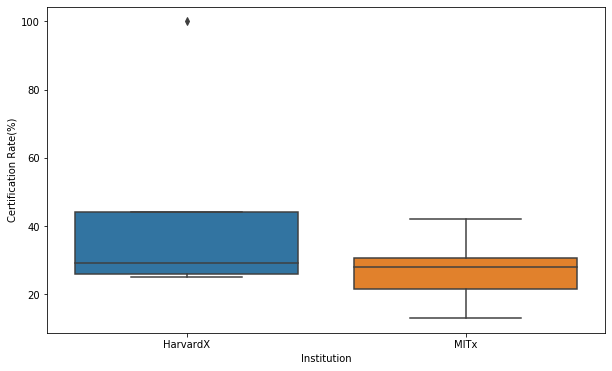

In [66]:
#boxplot of certification rate by institution
institution_course_df = institution_course_certi.reset_index()
institution_course_df.columns = ['institution', 'course_id', 'certification_rate']

plt.figure(figsize=(10, 6))
sb.boxplot(data=institution_course_df, x = 'institution', y = 'certification_rate')
plt.xlabel('Institution')
plt.ylabel('Certification Rate(%)')
plt.savefig("plots/15.pdf", bbox_inches='tight');

In [67]:
print('The 5 HarvardX courses have a mean certification rate of {} and a median of {} \n'.format(institution_course_certi['HarvardX'].mean(), institution_course_certi['HarvardX'].median()))

print('The 11 MITx courses have a mean certification rate of {} and a median of {}'.format(institution_course_certi['MITx'].mean(), institution_course_certi['MITx'].median()))

The 5 HarvardX courses have a mean certification rate of 44.8 and a median of 29.0 

The 11 MITx courses have a mean certification rate of 26.90909090909091 and a median of 28.0


In [68]:
# we will use an independent t test to check how significant is the difference between mean certification rate of HarvardX and MITx

t, p = stats.ttest_ind(institution_course_certi['HarvardX'], institution_course_certi['MITx'])

print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no sufficient evidence to show the significant difference between the two means')


The p value is 0.0918006594506718

p is relatively large, there is no sufficient evidence to show the significant difference between the two means


#### certification by different launch

In [69]:
# number of unique course_id and unique courses

df_intended.course_id.nunique(), df_intended.course_code.nunique()

(16, 13)

In [70]:
df_intended.course_id.unique()

array(['HarvardX/CS50x/2012', 'HarvardX/PH207x/2012_Fall',
       'HarvardX/ER22x/2013_Spring', 'HarvardX/PH278x/2013_Spring',
       'HarvardX/CB22x/2013_Spring', 'MITx/14.73x/2013_Spring',
       'MITx/6.002x/2012_Fall', 'MITx/6.00x/2013_Spring',
       'MITx/6.00x/2012_Fall', 'MITx/6.002x/2013_Spring',
       'MITx/8.02x/2013_Spring', 'MITx/8.MReV/2013_Summer',
       'MITx/7.00x/2013_Spring', 'MITx/3.091x/2012_Fall',
       'MITx/2.01x/2013_Spring', 'MITx/3.091x/2013_Spring'], dtype=object)

6.00x, 6.002x and 3.091x were offered twice. We will compare the certification rate between the two times.

In [71]:
# certification rate of courses offered two times
offered_twice_list = ['6.00x', '6.002x', '3.091x']
offered_twice_df = df_intended[df_intended.course_code.isin(offered_twice_list)]
offered_twice_df.groupby(['course_id']).certification_rate.mean()

course_id
MITx/3.091x/2012_Fall      36.0
MITx/3.091x/2013_Spring    28.0
MITx/6.002x/2012_Fall      32.0
MITx/6.002x/2013_Spring    28.0
MITx/6.00x/2012_Fall       19.0
MITx/6.00x/2013_Spring     13.0
Name: certification_rate, dtype: float64

The certification rate of the second launch all drops.

#### certification rate by semester

In [72]:
# certification rate by semester by course
semester_certi_df = df_intended.groupby(['semester', 'course_id']).certification_rate.mean().reset_index()
semester_certi_df.columns = ['semester', 'course_id', 'certification_rate']
semester_certi_df

,semester,course_id,certification_rate
0,2012_Fall,HarvardX/CS50x/2012,100.0
1,2012_Fall,HarvardX/PH207x/2012_Fall,29.0
2,2012_Fall,MITx/3.091x/2012_Fall,36.0
3,2012_Fall,MITx/6.002x/2012_Fall,32.0
4,2012_Fall,MITx/6.00x/2012_Fall,19.0
5,2013_Spring,HarvardX/CB22x/2013_Spring,25.0
6,2013_Spring,HarvardX/ER22x/2013_Spring,44.0
7,2013_Spring,HarvardX/PH278x/2013_Spring,26.0
8,2013_Spring,MITx/14.73x/2013_Spring,42.0
9,2013_Spring,MITx/2.01x/2013_Spring,22.0


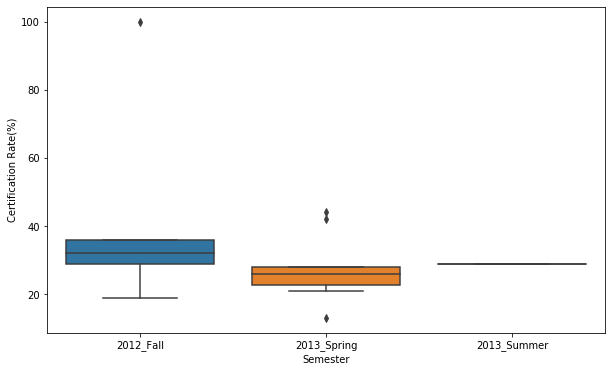

In [73]:
# Boxplot of certificationr rate by semester
plt.figure(figsize=(10, 6))
sb.boxplot(data=semester_certi_df, x='semester', y='certification_rate')
plt.xlabel('Semester')
plt.ylabel('Certification Rate(%)')
plt.savefig("plots/16.pdf", bbox_inches='tight');

The median certification rate for semester 2013_Spring is lower than 2012_Fall. 2013_Summer is much higher than 2013_Spring. However, since there is only 1 course in semester 2013_Summer, this is not very reliable.

In [74]:
# ANOVA test
fall_certi = semester_certi_df[semester_certi_df.semester=='2012_Fall'].certification_rate
spring_certi = semester_certi_df[semester_certi_df.semester=='2013_Spring'].certification_rate
summer_certi = semester_certi_df[semester_certi_df.semester=='2013_Summer'].certification_rate
f, p = stats.f_oneway(fall_certi, spring_certi, summer_certi)

print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the means of the three groups')
else:
    print('p is relatively large, there is no sufficient evidence to show the significant difference between means of the three groups')
    

#### course duration VS certification rate

In [ ]:
# certification rate by course duration by course
duration_certi_df = df_intended.groupby(['course_duration', 'course_id']).certification_rate.mean().reset_index()
duration_certi_df.columns = ['course_duration', 'course_id', 'certification_rate']
duration_certi_df

In [ ]:
# scatter plot of course duration VS certification rate
plt.figure(figsize=(6, 6))
plt.scatter(data=duration_certi_df, x='course_duration', y='certification_rate');
plt.xlabel('Course Duration(day)')
plt.ylabel('Certification Rate(%)')
plt.savefig("plots/17.pdf", bbox_inches='tight');

Although there are some outliers, the overall trend is as course duration increases, certification rate decreases, we will check the correlation coefficient below.

In [ ]:
# Pearson's correlation coefficient
np.corrcoef(duration_certi_df['course_duration'], duration_certi_df['certification_rate'])

The Pearson's correlation coefficient is not very big. There is a moderate positive correlation between course duration and certification rate.

#### course chapters VS certification rate

In [ ]:
# certification rate by course chapters by course
chapters_certi_df = df_intended.groupby(['course_chapters', 'course_id']).certification_rate.mean().reset_index()
chapters_certi_df.columns = ['course_chapters', 'course_id', 'certification_rate']
# scatter plot of course chapters VS certification rate
plt.figure(figsize=(6, 6))
plt.scatter(data=chapters_certi_df, x='course_chapters', y='certification_rate');
plt.xlabel('Number of Course Chapters')
plt.ylabel('Certification rate(%)')
plt.savefig("plots/18.pdf", bbox_inches='tight');

In [ ]:
# Pearson's correlation coefficient
np.corrcoef(chapters_certi_df['course_chapters'], chapters_certi_df['certification_rate'])

There is a weak negative correlation between course chapters and certification rate.

#### Course Subject

In [ ]:
# certification rate by course subject by course
course_subject_certi = df_intended.groupby(['course_subject', 'course_id']).certification_rate.mean()
course_subject_certi.round(2)

In [ ]:
# statistical description
print('Statistical Descriptionn of Certification rate of STEM courses:')
course_subject_certi['STEM'].describe().round(2).to_frame()

In [ ]:
# statistical description
print('Statistical Descriptionn of Certification rate of NON STEM courses:')
course_subject_certi['OTHERS'].describe().round(2)

In [ ]:
#boxplot of certification rate by course subject
course_subject_df = course_subject_certi.reset_index()
course_subject_df.columns = ['course_subject', 'course_id', 'certification_rate']

plt.figure(figsize=(10, 6))
sb.boxplot(data=course_subject_df, x = 'course_subject', y = 'certification_rate')
plt.xlabel('Course Subject')
plt.ylabel('Certification Rate(%)')
plt.savefig("plots/000.pdf", bbox_inches='tight');

In [ ]:
print('The 9 STEM courses have a mean certification rate of {} and a median of {} \n'.format(course_subject_certi['STEM'].mean(), course_subject_certi['STEM'].median()))

print('The 7 NON-STEM courses have a mean certification rate of {} and a median of {}'.format(course_subject_certi['OTHERS'].mean(), course_subject_certi['OTHERS'].median()))

In [ ]:
# we will use an independent t test to check how significant is the difference between mean certification rate of STEM courses and NON-STEM courses

t, p = stats.ttest_ind(course_subject_certi['STEM'], course_subject_certi['OTHERS'])

print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no sufficient evidence to show the significant difference between the two means')


In [ ]:
# 2 sample z test
t_sta, p = ztest(course_subject_certi['STEM'], course_subject_certi['OTHERS'])

print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no sufficient evidence to show the significant difference between the two means')


In [ ]:
# Wilcoxon rank-sum test

sta, p = stats.ranksums(course_subject_certi['STEM'], course_subject_certi['OTHERS'])

print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no significant difference between the two means')

### Demographic  variables

In this part, we explore Learners Demographic variables: Including country, level of education, age, gender


#### country VS certified

In [ ]:
# number of intended by country
intended_country = df_intended.groupby('country').size()
intended_country

In [ ]:
# number of certified by country
certified_country = df_intended[df_intended.certified==1].groupby('country').size()
certified_country

In [ ]:
# certification rate by country
certification_rate_country = 100*(certified_country / intended_country)

certification_rate_country.sort_values(ascending=False).round(2)

In [ ]:
# certification rate by country
certification_rate_country.sort_values(ascending=True).plot(figsize = (12,8), kind='barh')
plt.xlabel('Certification Rate(%)')
plt.ylabel('Country/ Region')
plt.savefig("plots/19.pdf", bbox_inches='tight');

The first few countries with a higher certification rate are from Europe

We will conduct a chi square test to whether certification is related to country

In [ ]:
# number of uncertified by country
uncertified_country = intended_country - certified_country
uncertified_country

In [ ]:
# get the frequency of certified and uncertified
certi_uncerti_table = pd.concat([certified_country, uncertified_country], axis=1).rename(columns={0: 'certified', 1: 'uncertified'})
certi_uncerti_table

In [ ]:
# chi square test for independence

stat, p, dof, expected = chi2_contingency(certi_uncerti_table)

print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference')
else:
    print('p is relatively large, there is no significant difference')

In [ ]:
# one way chi square test

chisq, p = stats.chisquare(certification_rate_country)

print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference')
else:
    print('p is relatively large, there is no significant difference')


#### education VS certified

In [ ]:
certification_rate_edu = 100*(df_intended[df_intended.certified==1].groupby('education').certified.count()) / df_intended.groupby('education').certified.count()

certification_rate_edu.sort_values(ascending=False)

In [ ]:
# certification rate by level of education
plt.figure(figsize=(10, 6))
certification_rate_edu.sort_values(ascending=True).plot(kind='bar')
plt.xlabel('Level of Education')
plt.ylabel('Certification Rate (%)')
plt.xticks(rotation=30)
plt.savefig("plots/20.pdf", bbox_inches='tight');

Master's has the highest certification rate. While Bachelor's has the lowest certification rate.

In [ ]:
# chi square test 
chisq , p = stats.chisquare(certification_rate_edu)

print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference')
else:
    print('p is relatively large, there is no significant difference')


#### age VS certified

In [ ]:
# boxplot of age VS certified or not
plt.figure(figsize=(6, 6))
sb.boxplot(data=df_intended, x='certified', y='age')
plt.xticks(ticks=[0, 1], labels = ['Uncertified', 'Certified'])
plt.xlabel('Certified or Not')
plt.ylabel('Age')
plt.savefig("plots/21.pdf", bbox_inches='tight');

There is no significant difference between age in certified and uncertified.

In [ ]:
# two samples t test
t, p = stats.ttest_ind(df_intended[df_intended.certified==1].age, df_intended[df_intended.certified==0].age)

print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference')
else:
    print('p is relatively large, there is no significant difference')


#### gender VS certified

In [ ]:
# certification rate by gender by course
certification_gender = 100*df_intended[df_intended.certified==1].groupby(['gender', 'course_id']).certified.count() / df_intended.groupby(['gender', 'course_id']).certified.count()

In [ ]:
# statistical description
print('Statistical Descriptionn of Certification rate of female:')
certification_gender['f'].describe()

In [ ]:
# statistical description
print('Statistical Descriptionn of Certification rate of male:')
certification_gender['m'].describe()

In [ ]:
certification_gender

In [ ]:
#boxplot of certification rate by gender 
certification_gender_df = certification_gender.reset_index()
certification_gender_df.columns = ['gender', 'course_id', 'certification_rate']

plt.figure(figsize=(10, 6))
sb.boxplot(data=certification_gender_df, x = 'gender', y = 'certification_rate')
plt.xlabel('Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Certification Rate (%)')
plt.savefig("plots/22.pdf", bbox_inches='tight');

Looks like female has a higher mean certification rate then male. How significant is this difference. We will do an independent t test below.

In [ ]:
# independent t test
t, p = stats.ttest_ind(certification_gender['f'], certification_gender['m'])

print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no significant difference between the two means')

#### age VS grade

In [ ]:
# scatter plot of grade VS age
plt.scatter(data=df_intended, x='age', y='grade',alpha=0.05)
plt.xlabel('Age')
plt.ylabel('Grade')
plt.savefig("plots/23.pdf", bbox_inches='tight');

It is not a very strong correlation, but we can still see that as age increase, the likelihood of getting a higher grade drops. students of age 20-30 are more likely to get a higher grade, while it is less likely for older age.

In [ ]:
# Pearson's correlation coefficient
np.corrcoef(df_intended['age'], df_intended['grade'])

The Pearson's correlation coefficient is pretty small, there is no significant correlation between age and grade.

#### region VS certified

In [ ]:
df_intended.region.value_counts()

In [ ]:
# certification rate by region by course
certification_region = 100*df_intended[df_intended.certified==1].groupby(['region', 'course_id']).certified.count() / df_intended.groupby(['region', 'course_id']).certified.count()
certification_region


In [ ]:
# statistical description
print('Statistical Descriptionn of Certification rate of US Region:')
certification_region['US'].describe()

In [ ]:
# statistical description
print('Statistical Descriptionn of Certification rate of Non-US region:')
certification_region['NonUS'].describe()

In [ ]:
#boxplot of certification rate by region
certification_region_df = certification_region.reset_index()
certification_region_df.columns = ['region', 'course_id', 'certification_rate']

plt.figure(figsize=(10, 6))
sb.boxplot(data=certification_region_df, x = 'region', y = 'certification_rate')
plt.xlabel('Region')
plt.xticks([0, 1], ['US', 'Non-US'])
plt.ylabel('Certification Rate (%)')
plt.savefig("plots/0001.pdf", bbox_inches='tight');

Looks like US region has a higher mean certification rate than non-US region. How significant is this difference. We will do an independent t test below.

In [ ]:
# independent t test
t, p = stats.ttest_ind(certification_region['US'], certification_region['NonUS'])

print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no significant difference between the two means')

In [ ]:
# 2 sample z test

sta, p = ztest(certification_region['US'], certification_region['NonUS'])

print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no significant difference between the two means')

In [ ]:
# Wilcoxon rank-sum test

sta, p = stats.ranksums(certification_region['US'], certification_region['NonUS'])

print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no significant difference between the two means')

### Learners activity variables

In this part, we explore learners activity variables: Including user_id, nevents, ndays_act, nplay_video, chapters_proportion, nforum_posts, registered_launch_delta, lifetime_proportion

####  user_id VS certified VS semester


In [ ]:
# numbber of course certified by user

user_certified_df = df_intended.groupby('user_id').certified.sum().reset_index()
user_certified_df.columns = ['user_id', 'ncourse_certified']


plt.hist(x=user_certified_df['ncourse_certified'], bins=5)
plt.xlabel('Number of Course Certified by User')
plt.ylabel('Number of User')
plt.savefig("plots/24.pdf", bbox_inches='tight');

In [ ]:
# description
user_certified_df.ncourse_certified.describe().round()

Most learners were not certified for any course. While there were also some learners certified for as many as 5 courses.

For those who had completed one course, are they more likely to complete a subsequent course? 

We will first select the users who completed at least one course in the 2012_Fall semester. Then we will look at the certification rate of those who registered in the 2013_Spring semester among those who completed a course in the 2012_Fall semester. We will also look at the overall certification rate of 2013_Spring semester for comparation.

In [ ]:
# learners who completed at least one course in the 2012_Fall semester.
user_list = df_intended[(df_intended.semester == '2012_Fall') & (df_intended.certified == 1)].user_id.unique()
user_list

In [ ]:
# 2013 Spring semester certification rate for learners who completed at least one course in the 2012_Fall semester.
df_2013_spring = df_intended[df_intended.semester == '2013_Spring']
df_2013_spring[df_2013_spring.user_id.isin(user_list)].certified.value_counts()


In [ ]:
certification_rate1 = df_2013_spring[df_2013_spring.user_id.isin(user_list)].certified.value_counts()[1]/df_2013_spring[df_2013_spring.user_id.isin(user_list)].shape[0]
print('The 2013 Spring semester certification rate for learners who completed at least one course in the 2012_Fall semester is {:.2%}'.format(certification_rate1))



In [ ]:
df_2013_spring.certified.value_counts()

In [ ]:
# 2013 Spring semester certification rate for all the learners
certification_rate2 = df_2013_spring[df_2013_spring.certified == 1].shape[0] / df_2013_spring.shape[0]
print('2013 Spring semester certification rate for all the learners is {:.2%}'.format(certification_rate2))

In [ ]:
# chi square test
stats.chisquare([286, 311], f_exp=[7445, 19545])

The p value is 0, there is sufficient evidence that these two certification rates are different. 

#### nevents VS certified

In [ ]:
plt.figure(figsize=(6, 6))
sb.boxplot(data=df_intended, x='certified', y='nevents')
plt.xlabel('Certified or Not')
plt.xticks([0, 1], ['Not Certified', 'Certified'])
plt.ylabel('Number of Events')
plt.savefig("plots/25.pdf", bbox_inches='tight');

Those who got certified have more events than those who did not.

In [ ]:
# independent t test
t, p = stats.ttest_ind(df_intended[df_intended.certified==1].nevents, df_intended[df_intended.certified==0].nevents)
print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no significant difference between the two means')

#### ndays_act VS certified

In [ ]:
sb.boxplot(data=df_intended, x='certified', y='ndays_act')
plt.xlabel('Certified or Not')
plt.xticks([0, 1], ['Not Certified', 'Certified'])
plt.ylabel('Number of Active Days')
plt.savefig("plots/26.pdf", bbox_inches='tight');

In [ ]:
# independent t test
t, p = stats.ttest_ind(df_intended[df_intended.certified==1].ndays_act, df_intended[df_intended.certified==0].ndays_act)
print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no significant difference between the two means')

#### nplay_video VS certified

In [ ]:
# boxplot of nplay_video VS certified
sb.boxplot(data=df_intended, x='certified', y='nplay_video')
plt.xlabel('Certified or Not')
plt.xticks([0, 1], ['Not Certified', 'Certified'])
plt.ylabel('Number of Videos Played')
plt.savefig("plots/27.pdf", bbox_inches='tight');

In [ ]:
# independent t test
t, p = stats.ttest_ind(df_intended[df_intended.certified==1].nplay_video, df_intended[df_intended.certified==0].nplay_video)
print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no significant difference between the two means')

#### chapters_proportion VS certified

In [ ]:
#boxplot of chapters_proportion VS certified
plt.figure(figsize=(6, 6))
sb.boxplot(data=df_intended, x='certified', y='chapters_proportion')
plt.xlabel('Certified or Not')
plt.xticks([0, 1], ['Not Certified', 'Certified'])
plt.ylabel('Percentage of Chapters Viewed')
plt.savefig("plots/28.pdf", bbox_inches='tight');

In [ ]:
# independent t test
t, p = stats.ttest_ind(df_intended[df_intended.certified==1].chapters_proportion, df_intended[df_intended.certified==0].chapters_proportion)
print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no significant difference between the two means')

#### nforum_posts VS certified

In [ ]:
# boxplot of nforum_posts VS certified
plt.figure(figsize=(6, 6))
sb.boxplot(data=df_intended, x='certified', y='nforum_posts')
plt.xlabel('Certified or Not')
plt.xticks([0, 1], ['Not Certified', 'Certified'])
plt.ylabel('Number of Forum Posts')
plt.savefig("plots/29.pdf", bbox_inches='tight');

In [ ]:
# independent t test
t, p = stats.ttest_ind(df_intended[df_intended.certified==1].nforum_posts, df_intended[df_intended.certified==0].nforum_posts)
print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no significant difference between the two means')

#### registered_launch_delta VS  certification rate 

In [ ]:
sb.boxplot(data=df_intended, x='certified', y='registered_launch_delta')
plt.xlabel('Certified or Not')
plt.xticks([0, 1], ['Not Certified', 'Certified'])
plt.ylabel('Enrollment Day Raletive to Launch')
plt.savefig("plots/30.pdf", bbox_inches='tight');

In [ ]:
# independent t test
t, p = stats.ttest_ind(df_intended[df_intended.certified==1].registered_launch_delta, df_intended[df_intended.certified==0].registered_launch_delta)
print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no significant difference between the two means')

The average days of registered after course launch is close for certified and uncertified.

#### lifetime_proportion VS certified

In [ ]:
# boxplot of lifetime_proportion VS certified
sb.boxplot(data=df_intended, x='certified', y='lifetime_proportion')
plt.xlabel('Certified or Not')
plt.xticks([0, 1], ['Not Certified', 'Certified'])
plt.ylabel('Proportion of User Lifetime in Course Duration')
plt.savefig("plots/31.pdf", bbox_inches='tight');

In [ ]:
# independent t test
t, p = stats.ttest_ind(df_intended[df_intended.certified==1].lifetime_proportion, df_intended[df_intended.certified==0].lifetime_proportion)
print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no significant difference between the two means')

Those certified have more events, more active days , more videos played, more chapters viewed and a higher lifetime proportion.

The number of posts are pretty small for both certified and uncertified,it is hard to interprete a significant difference. 

#### nevents VS grade

In [ ]:
# scatter plot of nevents VS grade
plt.scatter(data=df_intended, x='nevents', y='grade', alpha=0.05)
plt.ylabel('Grade')
plt.xlabel('Number of Events')
plt.savefig("plots/32.pdf", bbox_inches='tight');

In [ ]:
# Pearson's correlation coefficient
np.corrcoef(df_intended['grade'], df_intended['nevents'])

There is a moderate positive correlation between grade and nevents

#### ndays_act VS grade

In [ ]:
# scatter plot of grade VS ndays_act
plt.scatter(data=df_intended, x='ndays_act', y='grade', alpha=0.05)
plt.ylabel('Grade')
plt.xlabel('Number of Active Days')
plt.savefig("plots/33.pdf", bbox_inches='tight');

In [ ]:
# Pearson's correlation coefficient
np.corrcoef(df_intended['grade'], df_intended['ndays_act'])

There is a strong positive correlation between grade and number of active days

#### nplay_video VS grade

In [ ]:
# Scatter plot of Number of video played VS grade
plt.scatter(data=df_intended, x='nplay_video', y='grade', alpha=0.05)
plt.ylabel('Grade')
plt.xlabel('Number of Videos Played')
plt.savefig("plots/34.pdf", bbox_inches='tight');

In [ ]:
# Pearson's correlation coefficient
np.corrcoef(df_intended['grade'], df_intended['nplay_video'])

There is a weak positive correlation between nplay_video and grade

#### chapters_proportion VS grade

In [ ]:
# scatter plot of chapters_proportion VS grade
plt.scatter(data=df_intended, x='chapters_proportion', y='grade', alpha=0.05)
plt.ylabel('Grade')
plt.xlabel('Proportion of Chapters Viewed')
plt.savefig("plots/35.pdf", bbox_inches='tight');

In [ ]:
# Pearson's correlation coefficient
np.corrcoef(df_intended['grade'], df_intended['chapters_proportion'])

There is a strong positive correlation between chapters_proportion.

#### nforum_posts VS grade

In [ ]:
#  scatter plot of posts VS grade
plt.scatter(data=df_intended, x='nforum_posts', y='grade', alpha=0.05)
plt.ylabel('Grade')
plt.xlabel('Number of Forum Posts')
plt.savefig("plots/36.pdf", bbox_inches='tight');

In [ ]:
# Pearson's correlation coefficient
np.corrcoef(df_intended['grade'], df_intended['nforum_posts'])

There is no significant correlation between posts and grade.

#### registered_launch_delta VS grade

In [ ]:
# scatter plot of registered_launch_delta VS grade
plt.scatter(data=df_intended, x='registered_launch_delta', y ='grade', alpha=0.1)
plt.xlabel('Enrollment Day Raletive to Launch')
plt.ylabel('Grade')
plt.savefig("plots/37.pdf", bbox_inches='tight');

In [ ]:
# Pearson's correlation coefficient
np.corrcoef(df_intended['grade'], df_intended['registered_launch_delta'])

There is no significant correlation between posts and grade.

#### lifetime_proportion SV grade

In [ ]:
# scatter plot of lifetime_proportion SV grade
plt.scatter(data=df_intended, x='lifetime_proportion', y='grade', alpha=0.02)
plt.ylabel('Grade')
plt.xlabel('Percentage of User Lifetime in Course Duration')
plt.savefig("plots/38.pdf", bbox_inches='tight');

In [ ]:
# Pearson's correlation coefficient
np.corrcoef(df_intended['grade'], df_intended['lifetime_proportion'])

There is a weak positive correlation between lifetime_proportion and grade.

**Summary:**

Based on the exploration above:

- Variables like Institution, semester, level of education, age, gender, nforum_posts, registered_launch_delta have no correlation with certification.
- Variables like country, nplayvideo, lifetime_proportion, course_duration, nevents, course_chapters, ndays_act, chapters_proportion are correlated with certification. Among these variabels, course_chapters, ndays_act, chapters_proportion have a strong correlation with certification. 



## Save Dataset

Save the intended dataset for prediction with machine learning.

In [ ]:
df_intended.to_csv('hmx_intended.csv', index=False)